# INVESTIGATING A MOVIE DATASET
## EXPLORATORY DATA ANALYSIS



###   

## TEAM: 008
### PES2UG20CS201  : Md. Sayeed Akram
### PES2UG20CS240  : Parth Praveen Shetty
### PES2UG20CS260  : Raghav Chugh


###  

#### IMPORTING LIBRARIES

In [1]:
import csv
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import math

from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

#### READING CSV FILE

In [2]:
df=pd.read_csv("tmdb_movies_data.csv") #reading csv file
df.head() #first 5 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


#### Number of Rows and Columns 

In [3]:
print("Number of rows in dataset: ",len(df.index)) #number of rows
print("Number of columns in dataset: ",len(df.columns)) #number of attributes
print('\n\n')
print("Attributes of dataset are:-\n\n", df.columns) #names of attributes

Number of rows in dataset:  10866
Number of columns in dataset:  21



Attributes of dataset are:-

 Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


#### Exploring Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.dtypes #all datatypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.describe() #gives summary

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Outliers

In [7]:
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 #inter-quartile range

print("OUTLIERS")
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() #sum of outliers in each attribute

OUTLIERS


budget                  1370
budget_adj              1231
cast                       0
director                   0
genres                     0
homepage                   0
id                      1606
imdb_id                    0
keywords                   0
original_title             0
overview                   0
popularity               946
production_companies       0
release_date               0
release_year             403
revenue                 1736
revenue_adj             1689
runtime                  781
tagline                    0
vote_average             197
vote_count              1518
dtype: int64

#### Missing Values

In [8]:
print("MISSING VALUES")
df.isnull().sum()

MISSING VALUES


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Duplicates, Incorrect and Incomplete values

In [9]:
print("Duplicates: ",df.duplicated().sum())

n=len(df.columns)
sm=0
for i in range (0, n):
    k=df.columns[i]
    sm+=(df[k]==0).sum()
print("Incorrect:",sm)


df3=df.isnull().sum()
sm=0
for i in range (0,n):
    sm+=(df3[i])
print("Incomplete:",sm)


Duplicates:  1
Incorrect: 23455
Incomplete: 13434


#### Correlation - using numbers

In [10]:
df7=df.corr()
df7.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676


In [11]:
((df7 > 0.5)).sum()-1

id              1
popularity      5
budget          5
revenue         5
runtime         0
vote_count      5
vote_average    0
release_year    1
budget_adj      5
revenue_adj     5
dtype: int64

#### Correlation using HeatMap

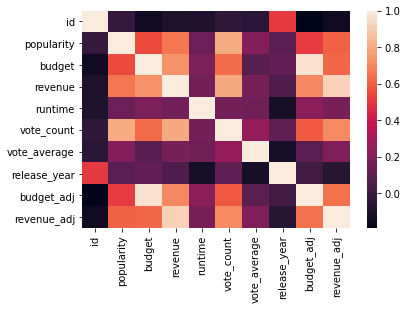

In [12]:
corr=df.corr()
sns.heatmap(corr,vmax=1)
plt.show()

###### End of EDA 

#### An attempt to clean the data 

In [13]:
# Delete unnecessary columns
df.drop(['id', 'imdb_id','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,2015


In [14]:
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

#### Dropping Duplicates

In [15]:
df.drop_duplicates(inplace=True)

#### Filling Null values and dropping

In [16]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

df.dropna(inplace =True)

#### Checking for null & duplicate values

In [17]:
print(df.isnull().sum())
print(df.duplicated().sum())

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64
0


#### Checking for incorrect and incomplete values

In [18]:

n=len(df.columns)
sm=0
for i in range (0, n):
    k=df.columns[i]
    sm+=(df[k]==0).sum()
print("Incorrect:",sm)


df3=df.isnull().sum()
sm=0
for i in range (0,n):
    sm+=(df3[i])
print("Incomplete:",sm)


Incorrect: 0
Incomplete: 0


In [19]:
df.shape

(3849, 10)

##### End of data cleaning

In [20]:
print("FLOP MOVIES: ")
y = df.loc[(df['budget']>df['revenue']) , 'original_title']
print(y)
print("There are ",len(y),"Flop movies in dataset")

FLOP MOVIES: 
57                                 Mortdecai
59                                  Blackhat
66                   In the Heart of the Sea
73                                       Pan
84                                   Tracers
                        ...                 
10675              The Ballad of Cable Hogue
10683    The Private Life of Sherlock Holmes
10716           The Greatest Story Ever Told
10728                         The Wild Bunch
10788                                The Wiz
Name: original_title, Length: 1070, dtype: object
There are  1070 Flop movies in dataset


In [21]:
#print('Hit movies')
#for x in df['revenue']:
   # for y in df['budget']:
       # if (x>y):
            #print(df['original_title'])
print("HIT MOVIES: ")
x = df.loc[(df['revenue']>df['budget']) , 'original_title']
print(x)
print("There are ",len(x),"hit movies in dataset")

HIT MOVIES: 
0                         Jurassic World
1                     Mad Max: Fury Road
2                              Insurgent
3           Star Wars: The Force Awakens
4                              Furious 7
                      ...               
10822    Who's Afraid of Virginia Woolf?
10828                       Torn Curtain
10829                          El Dorado
10835                   The Sand Pebbles
10848                   Fantastic Voyage
Name: original_title, Length: 2776, dtype: object
There are  2776 hit movies in dataset


In [22]:
print("AVERAGE MOVIES: ")
z = df.loc[(df['budget']==df['revenue']) , 'original_title']
print(z)
print("There are ",len(z),"Average movies in dataset")

AVERAGE MOVIES: 
5198     Les Clefs de bagnole
7250                    Narco
10777                F.I.S.T.
Name: original_title, dtype: object
There are  3 Average movies in dataset


#### Correlation2.0

In [23]:
df7=df.corr()
df7.head()

,popularity,budget,revenue,runtime,release_year
popularity,1.000000,0.446563,0.615348,0.215510,0.173599
budget,0.446563,1.000000,0.688403,0.261489,0.268464
revenue,0.615348,0.688403,1.000000,0.250728,0.139316
runtime,0.215510,0.261489,0.250728,1.000000,-0.112954
release_year,0.173599,0.268464,0.139316,-0.112954,1.000000


In [24]:
((df7 > 0.5)).sum()-1

popularity      1
budget          1
revenue         2
runtime         0
release_year    0
dtype: int64

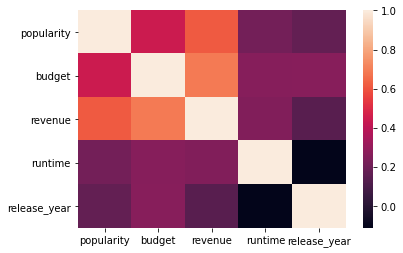

In [25]:
corr=df.corr()
sns.heatmap(corr,vmax=1)
plt.show()

#### Let's visualise 

<AxesSubplot:title={'center':'RELEASE YEAR vs BUDGET'}, xlabel='release_year', ylabel='budget'>

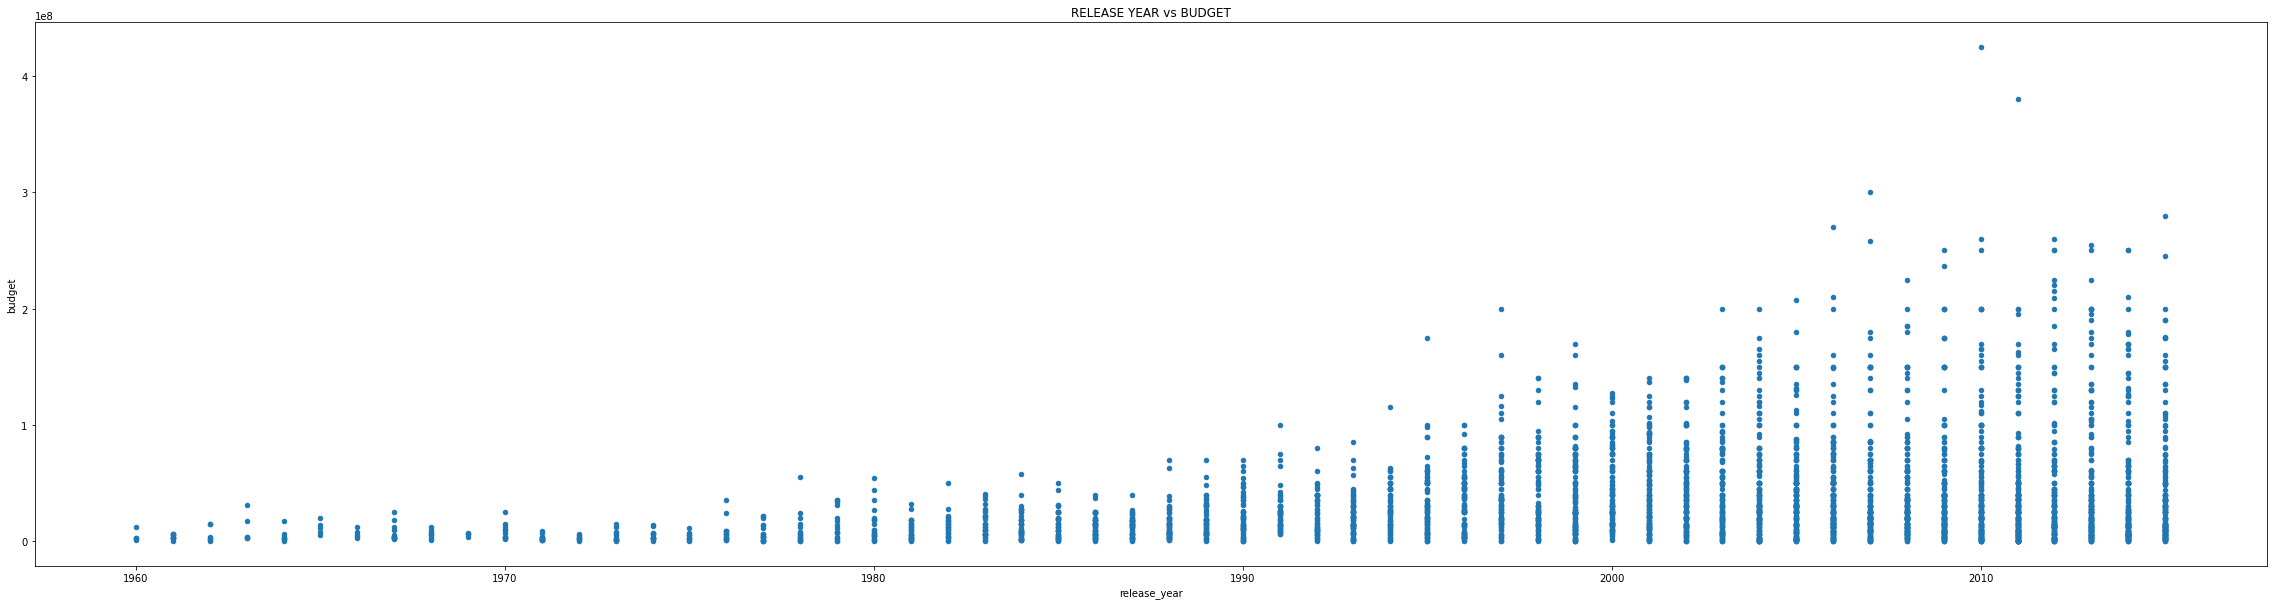

In [26]:
df.plot(x="release_year", y="budget",kind="scatter", figsize=(40,10), title="RELEASE YEAR vs BUDGET")

<AxesSubplot:title={'center':'REVENUE vs BUDGET'}, xlabel='budget', ylabel='revenue'>

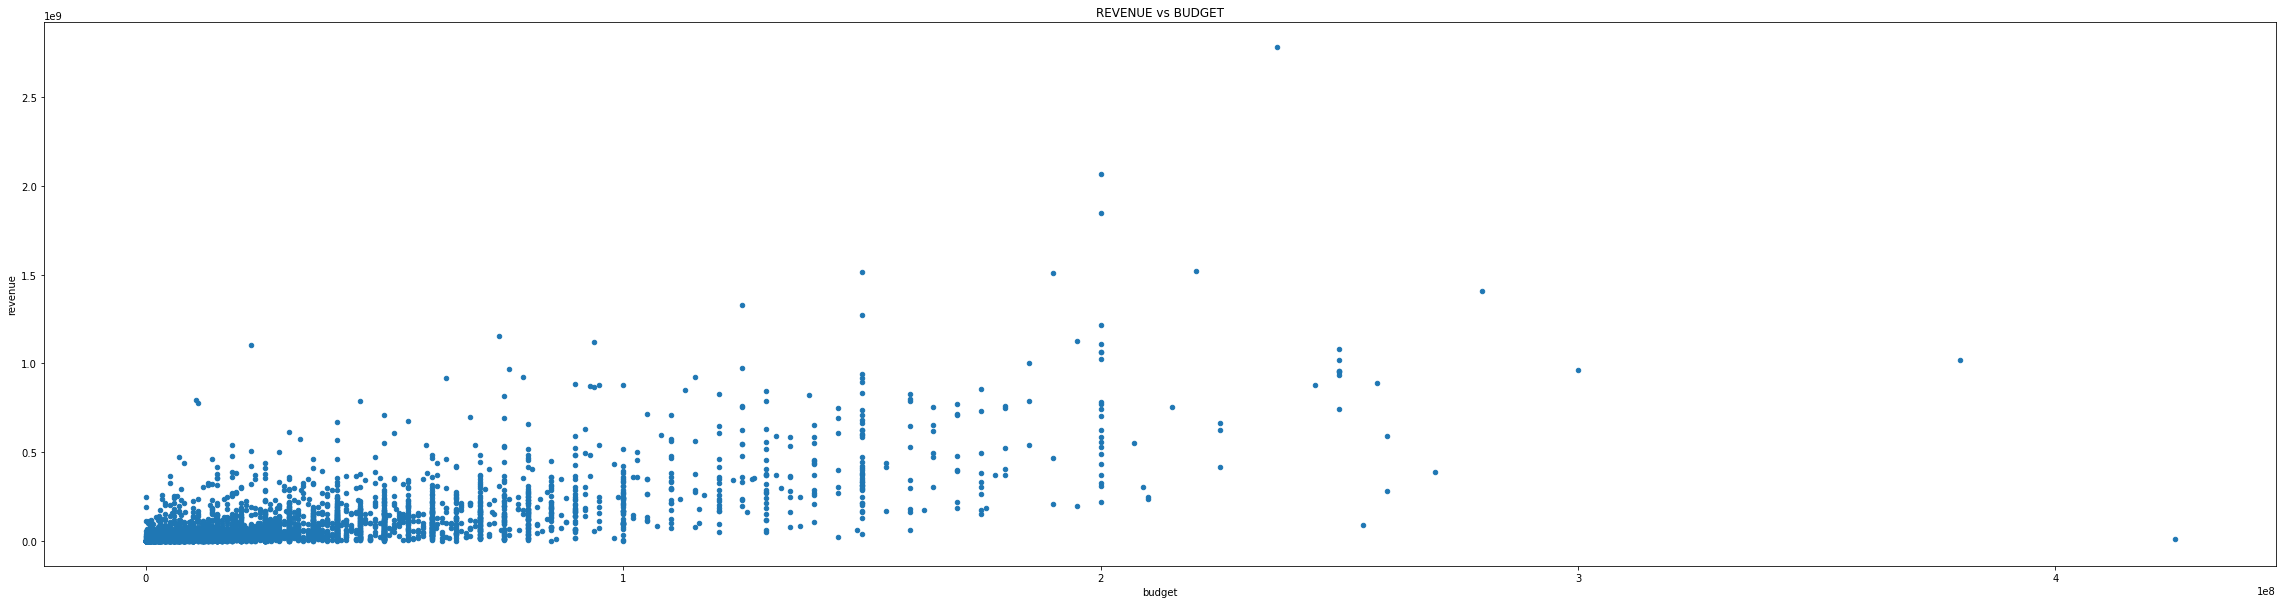

In [27]:
df.plot(x="budget", y="revenue",kind="scatter", figsize=(40,10), title="REVENUE vs BUDGET")

In [28]:
dfneww=df.head(50)
dfneww.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,2015


#### Visualisation 2.0 (with selected values @top50)

<AxesSubplot:title={'center':'POPULARITY vs BUDGET'}, xlabel='popularity'>

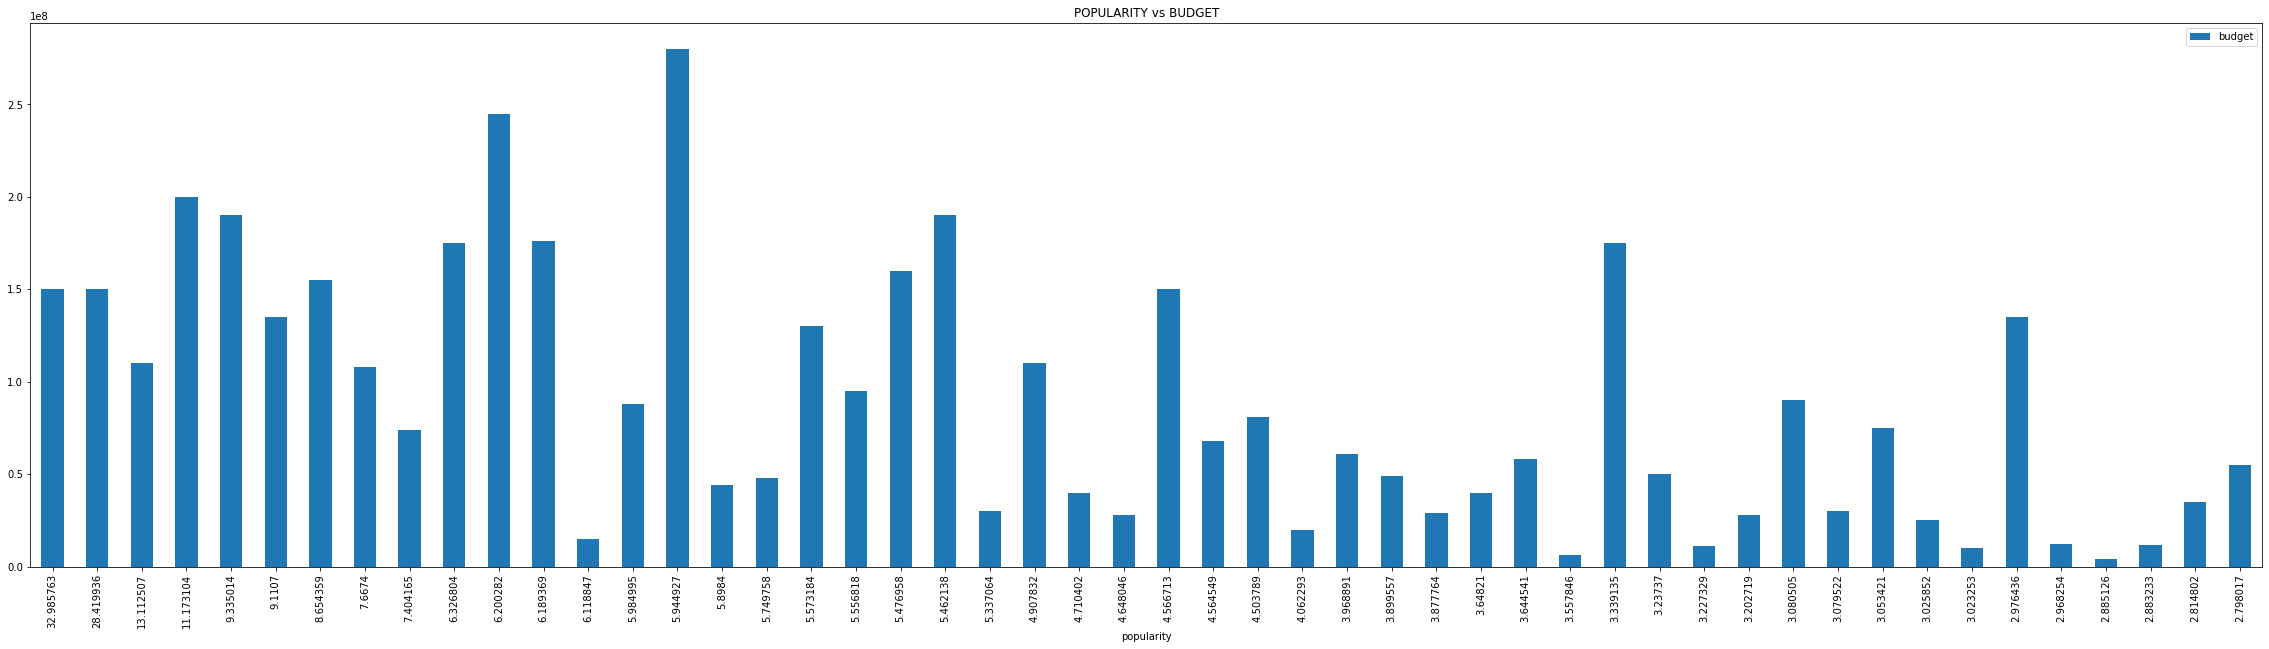

In [29]:
dfneww.plot(x="popularity", y="budget",kind="bar", figsize=(40,10), title="POPULARITY vs BUDGET")

<AxesSubplot:title={'center':'RUNTIME vs BUDGET'}, xlabel='budget'>

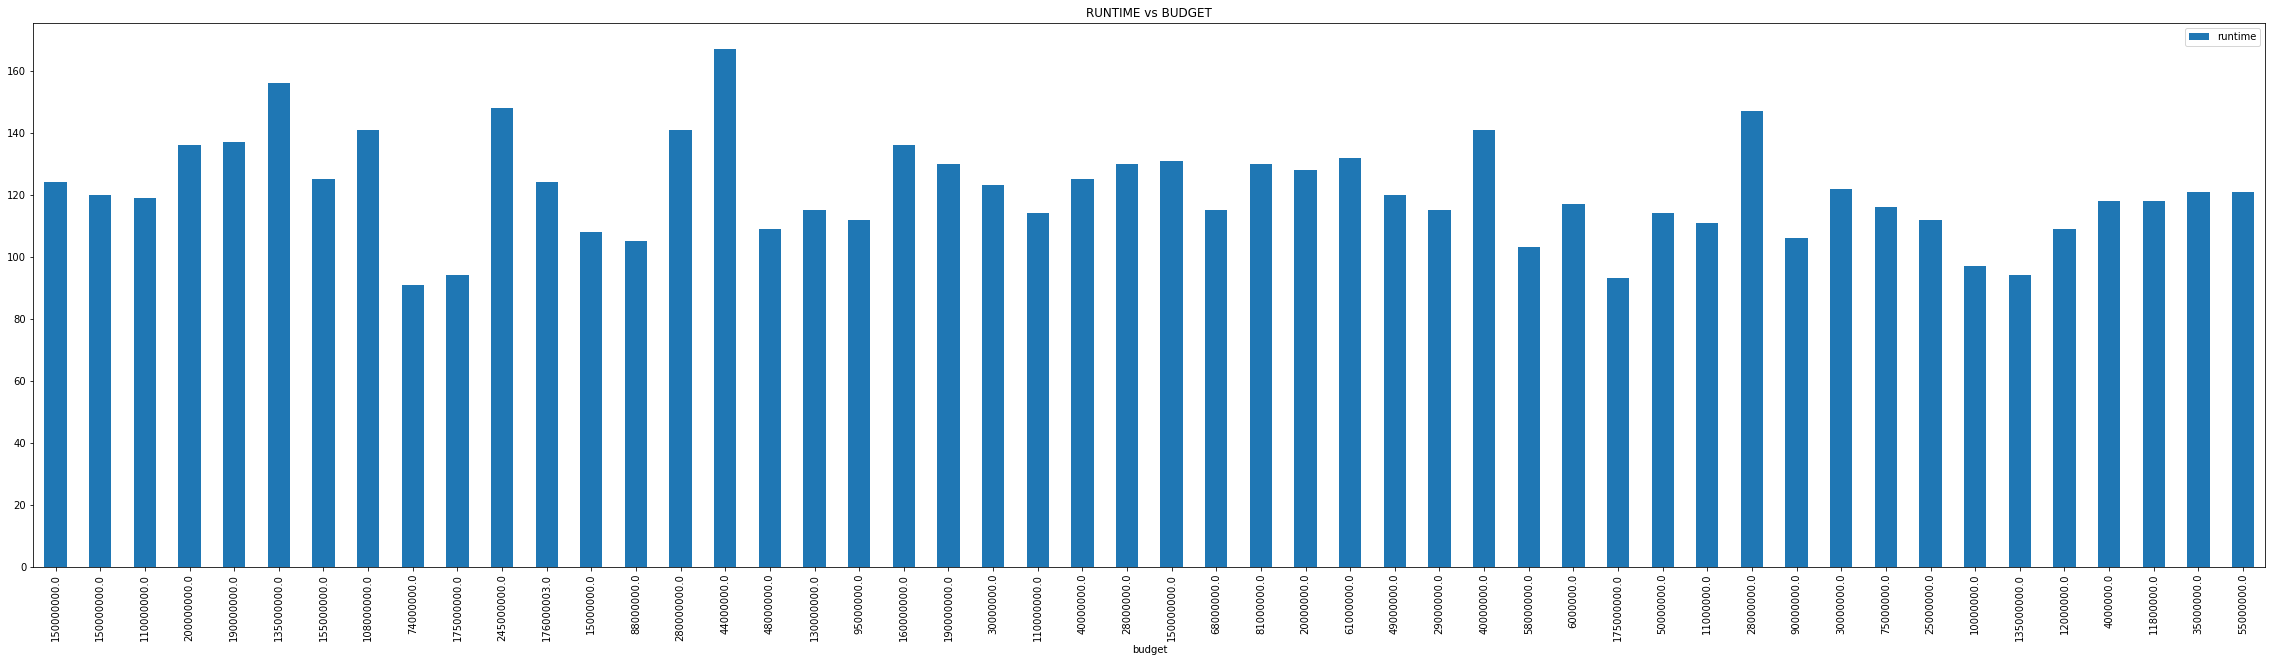

In [30]:
dfneww.plot(x="budget", y="runtime",kind="bar", figsize=(40,10), title="RUNTIME vs BUDGET")

### Let's analyse 

### > Which movies are the most profitable to the market?

In [31]:
df['profit'] = df['revenue'] - df['budget']
df['revenue'] = df['revenue'].astype(int)
df.head(4)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015,1.363529e+09
1,28.419936,150000000.0,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015,2.284364e+08
2,13.112507,110000000.0,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2015,1.852382e+08
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015,1.868178e+09


In [32]:

df7=df.sort_values(['profit'], ascending = False).head(10)
dfk=df.sort_values(['profit'], ascending = False)
df.sort_values(['profit'], ascending = False).head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
1386,9.432768,237000000.0,-2147483648,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/2009,2009,2.544506e+09
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015,1.868178e+09
5231,4.355219,200000000.0,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,11/18/1997,1997,1.645034e+09
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015,1.363529e+09
4,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,2015,1.316249e+09
4361,7.637767,220000000.0,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,4/25/2012,2012,1.299558e+09
3374,5.711315,125000000.0,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,7/7/2011,2011,1.202818e+09
14,5.944927,280000000.0,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,4/22/2015,2015,1.125036e+09
5422,6.112766,150000000.0,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,11/27/2013,2013,1.124219e+09
8094,1.136610,22000000.0,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,7/28/1995,1995,1.084280e+09


In [33]:
dfk.tail()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
4970,1.653031,100000000.0,250,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,10/20/2003,2003,-99999750.0
3484,0.921653,150000000.0,38992758,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,88,Adventure|Animation|Family,3/9/2011,2011,-111007242.0
7031,0.948560,145000000.0,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137,Western|History|War,4/7/2004,2004,-119180039.0
5508,1.214510,255000000.0,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,7/3/2013,2013,-165710090.0
2244,0.250540,425000000.0,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,12/2/2010,2010,-413912431.0


#### Above are top 10 movies with the most earned profit. Clearly these titles are well knowed. Avatar is at tops 1, which profit exceded way more than the following movies.

### > Which movies have the most and least profit, budget and runtime?

In [34]:
def max_min_data(column_name):
    #highest rated movie
    highest_movie = df[column_name].idxmax()
    highest_df = pd.DataFrame(df.loc[highest_movie])
    
    #least rated movie 
    lowest_movie = df[column_name].idxmin()
    lowest_df = pd.DataFrame(df.loc[lowest_movie])
    
    #concatenating to comp
    max_min_data = pd.concat([highest_df, lowest_df], axis = 1)
    
    return max_min_data


max_min_data('profit')




,1386,2244
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,-2147483648,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,12/10/2009,12/2/2010
release_year,2009,2010


In [35]:
max_min_data('budget')


,2244,2618
popularity,0.25054,0.090186
budget,425000000.0,1.0
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,12/2/2010,4/23/1999
release_year,2010,1999


In [36]:
max_min_data('runtime')

,2107,5162
popularity,0.534192,0.208637
budget,18000000.0,10.0
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,5/19/2010,6/2/2003
release_year,2010,2003


#### Let's visualise the table toppers now :)

<AxesSubplot:title={'center':'TOP TEN MOVIES AND ITS PROFIT'}, xlabel='original_title'>

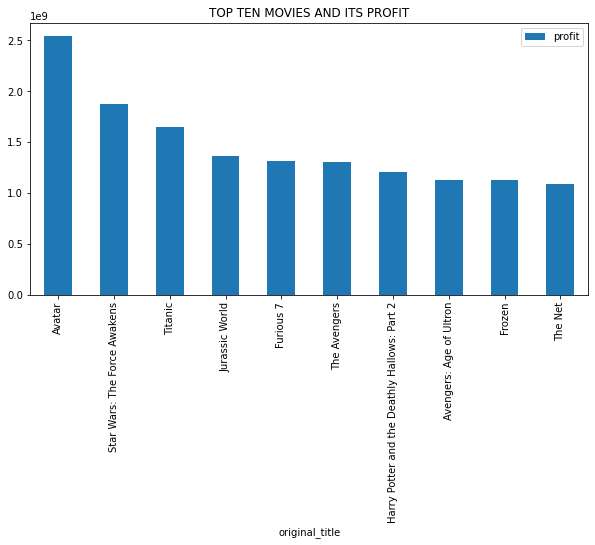

In [37]:
df8=df7.iloc[:10]
df8.plot(x="original_title", y="profit",kind="bar", figsize=(10,5), title="TOP TEN MOVIES AND ITS PROFIT")

In [38]:
df10=df.sort_values(['budget'], ascending = False).head(10)
df10.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
2244,0.250540,425000000.0,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,12/2/2010,2010,-4.139124e+08
3375,4.955130,380000000.0,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,5/11/2011,2011,6.416830e+08
7387,4.965391,300000000.0,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,5/19/2007,2007,6.610000e+08
14,5.944927,280000000.0,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,4/22/2015,2015,1.125036e+09
6570,1.957331,270000000.0,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,6/28/2006,2006,1.210812e+08


<AxesSubplot:title={'center':'TOP TEN MOVIES AND ITS BUDGET'}, xlabel='original_title'>

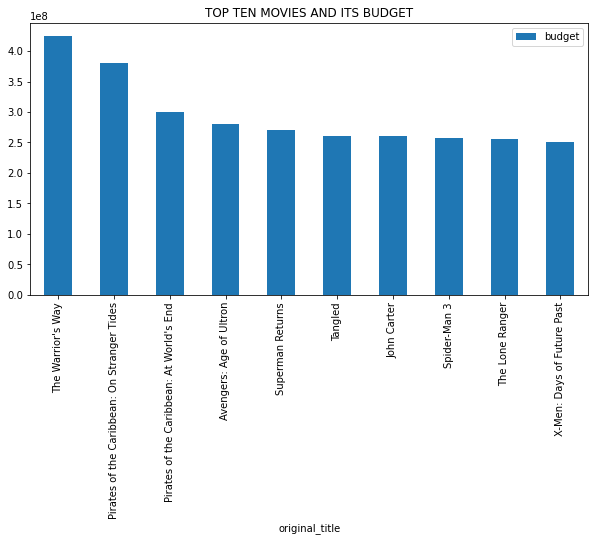

In [39]:
df11=df10.iloc[:10]
df11.plot(x="original_title", y="budget",kind="bar", figsize=(10,5), title="TOP TEN MOVIES AND ITS BUDGET")

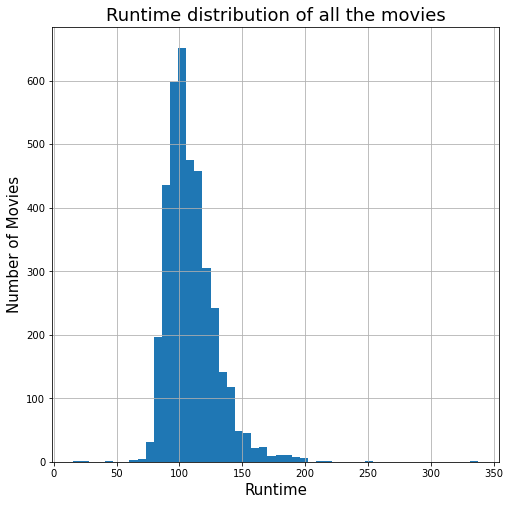

In [40]:
df['runtime'].hist(figsize = (8,8), bins = 50)
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18);

#### Most movies are about 110 minutes.

### > How does popularity affect the profit?

0.5960802044338906

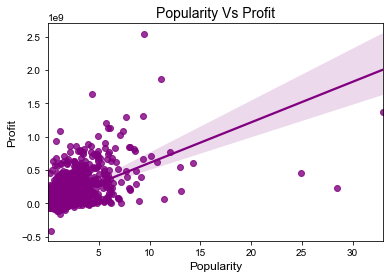

In [41]:

# Create a scatter plot to study relationship between popularity and porfit.

ax = sns.regplot(x=df['popularity'],y=df['profit'],color='purple')
#regplot is used to plot data and a linear regression model fit.

ax.set_title("Popularity Vs Profit",fontsize=14)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})


dfcx=df.loc[:,['profit','popularity']]
dfff=dfcx.corr()
dfff["profit"]["popularity"] #.head()
#print(dfff.loc['profit','popularity'])


#### From the scatter plot, it can be concluded that there is a positive relationship between popularity and profit. 
#### The trend line is on a uphill direction and the correlation coefficient value is calculated to be positive.

### > Which years do movies made the most profits

In [42]:
profit_year = df.groupby('release_year')['profit'].sum()
profit_year.head(5)

release_year
1960    108198052.0
1961    299083188.0
1962    166879846.0
1963    115411882.0
1964    294678387.0
Name: profit, dtype: float64

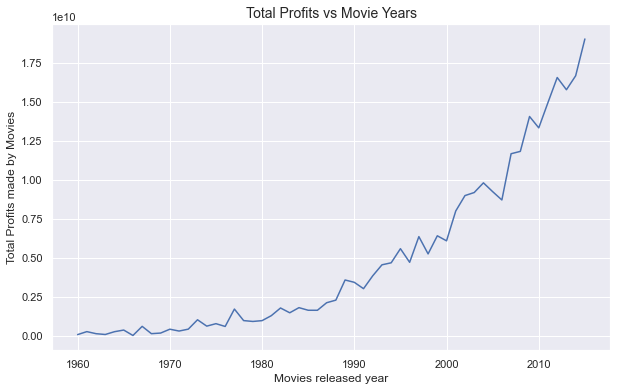

In [43]:
profit_year.plot(figsize = (10,6))
plt.xlabel('Movies released year', fontsize = 12)
plt.ylabel('Total Profits made by Movies', fontsize = 12)
plt.title('Total Profits vs Movie Years', fontsize = 14);

In [44]:
budget_year = df.groupby('release_year')['budget'].sum()
budget_year.head()

release_year
1960    20806948.0
1961    38637000.0
1962    39450000.0
1963    61115000.0
1964    33935161.0
Name: budget, dtype: float64

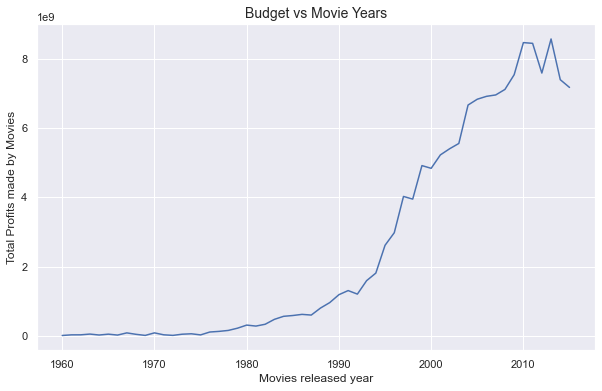

In [45]:
budget_year.plot(figsize = (10,6))
plt.xlabel('Movies released year', fontsize = 12)
plt.ylabel('Total Profits made by Movies', fontsize = 12)
plt.title('Budget vs Movie Years', fontsize = 14);

 ### The plot shows that profits increases as years increases.

### > What are the top casts, directors and genres?


In [46]:
df.loc[:,['original_title', 'cast', 'director', 'genres']].head()


,original_title,cast,director,genres
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller


### > Which months have higher profits


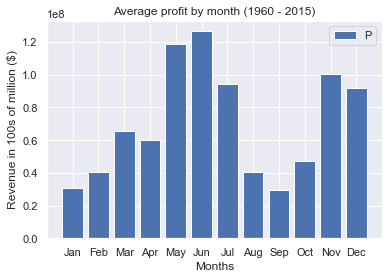

In [47]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_month']=df['release_date'].dt.month
profit_by_month = df.groupby('release_month')['profit'].mean()
#df.plot(x="release_month", y="profit_by_month",kind="bar", figsize=(10,5), title="Month vs Profit")
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(np.arange(0, 12), profit_by_month, tick_label = months, )
plt.title('Average profit by month (1960 - 2015)');
plt.ylabel('Revenue in 100s of million ($)');
plt.xlabel('Months');
plt.legend('Profit');

### > Top Casts, Directors and genres

In [48]:
df.loc[:,['original_title', 'cast', 'director', 'genres']].head()

,original_title,cast,director,genres
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller


In [49]:
def extract_data(column_name):
    df['cast']=df['cast'].astype(str)
    df['director']=df['director'].astype(str)
    all_data = df[column_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))
    count = all_data.value_counts(ascending = False)
    return count

In [50]:
cast_count = extract_data('cast')
cast_count = pd.DataFrame(data=cast_count)
top_cast = cast_count.head(10)
top_cast

,0
Robert De Niro,52
Bruce Willis,46
Samuel L. Jackson,44
Nicolas Cage,43
Matt Damon,36
Johnny Depp,35
Sylvester Stallone,34
Brad Pitt,34
Harrison Ford,34
Morgan Freeman,34


In [51]:
director_count = extract_data('director')
director_count = pd.DataFrame(data=director_count)
top_director = director_count.head(10)
top_director

,0
Steven Spielberg,28
Clint Eastwood,24
Ridley Scott,21
Woody Allen,18
Tim Burton,17
Martin Scorsese,17
Robert Rodriguez,17
Steven Soderbergh,17
Robert Zemeckis,15
Brian De Palma,15


In [52]:
genres_count = extract_data('genres')
genres_count = pd.DataFrame(data=genres_count)
top_genres = genres_count.head(10)
top_genres

,0
Drama,1753
Comedy,1357
Thriller,1203
Action,1085
Adventure,749
Romance,666
Crime,651
Science Fiction,519
Horror,463
Family,425


In [53]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit,release_month
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09,6
1,28.419936,150000000.0,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,2.284364e+08,5
2,13.112507,110000000.0,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.852382e+08,3
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.868178e+09,12
4,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1.316249e+09,4



### Applying Linear Regression

In [68]:
df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
profit                   float64
release_month              int64
dtype: object

In [69]:
 df['revenue']=df['revenue'].astype(float)
 #df['original_title']=df['original_title'].astype(str)

In [70]:
df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
profit                   float64
release_month              int64
dtype: object

In [71]:
dependent_variable = 'profit'

In [72]:
independent_variables = ['popularity','budget','revenue','runtime']

In [73]:
independent_variables

['popularity', 'budget', 'revenue', 'runtime']

In [74]:
# Create the data of independent vriables
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values
#X = ['popularity','budget','revenue']
#y ='profit'

In [75]:
#Splitting the dataset into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [76]:
# Fitting Multiple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [77]:
# Predicting on the test data set
y_pred = ml.predict(X_test)
print(y_pred) 

[-1.93968655e+06 -2.58987921e+06  1.33034315e+08  6.62418902e+05
  2.94615670e+07  3.58282823e+07  3.01571425e+08  2.50330588e+07
  4.38001807e+08  4.82083733e+06  1.85628784e+08  1.05511149e+08
  1.38541441e+06  2.03236784e+08  8.66195203e+07  4.16016714e+08
 -8.33818073e+06  1.43045024e+07  2.68548796e+08 -9.21041201e+06
 -8.62831958e+06 -1.59404352e+07 -9.80880226e+06 -6.13433872e+06
  8.64943340e+07  5.12652873e+06  1.28490434e+07 -6.59648829e+06
  9.34460674e+06  2.25032616e+06  3.27351564e+08  5.92748186e+07
 -3.06047926e+06 -7.46969483e+06  7.49812074e+06  2.20511928e+07
  5.84866580e+07 -8.34660703e+06  5.11635607e+07  7.13859499e+07
  4.66162969e+06  1.06894442e+08  4.30966964e+07 -6.27958356e+06
  6.44632328e+07  1.11989173e+08  2.81293114e+07  2.15934905e+08
  5.66666984e+06 -6.68920819e+06 -1.07103393e+06  8.03140457e+07
  3.04661298e+07  1.92854322e+08  9.67817513e+07  8.15104382e+07
  3.30129424e+08 -1.45990246e+07  6.94767289e+07  7.23406559e+08
  1.41102949e+08  5.57121

### Hit Or Flop ?

In [78]:
def fun(profit):
    if(profit > 0):
        print("Movie will be a HIT")
    else:
        print("Movie might be potential flop")

### Testing for values already in Dataset

In [79]:
arr=ml.predict([[32.985763, 150000000.0 ,1513528810,124]])
profit=arr[0]
print(profit)
print()
fun(profit)

1594088493.4077456

Movie will be a HIT


In [80]:
arr=ml.predict([[0.921653,150000000.0,38992758.0,88]])
profit=arr[0]
print(profit)
print()
fun(profit)

-6099837.998527303

Movie might be potential flop


In [81]:
arr=ml.predict([[1.653031,10000000038992758.0,250.0,88]])
profit=arr[0]
print(profit)
print()
fun(profit)

-2166457940847502.0

Movie might be potential flop
